### Import libraries

In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

### Import CSV files into an Dataframe

In [2]:
# import csv files
def create_dataframe(filename, sep, verbose=True):
    """Create pandas dataframe from a csv file
filename: the csv filename
sep: input here the kind of separator
    """
    df = pd.read_csv(filename, sep=sep)
    if verbose:
        print(df.info())
    return df

In [3]:
    df_test = create_dataframe("test.csv", ",")
    df_train = create_dataframe("train.csv", ",")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pcl

In [4]:
df_train["Cabin"].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [5]:
df_train["Cabin"].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [6]:
df_train.columns
df_train[["Survived", "Age","SibSp", "Parch", "Pclass", "Fare"]].describe()
df_train[df_train["Fare"]> 500]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [7]:
#Check for people with a fare tickets higher than 500
df_train_rich = df_train[df_train["Fare"]> 500]
#df_train_rich.to_csv("train_fare_500.csv")

In [8]:
#Check the Fare for people which were in cabin category B
df_train_B = df_train[df_train["Cabin"].str[0] =="B"]
print(df_train[df_train["Cabin"].str[0] =="B"].describe())
# It seems one is at 0, let's check for this one

       PassengerId   Survived  Pclass        Age      SibSp      Parch  \
count    47.000000  47.000000    47.0  45.000000  47.000000  47.000000   
mean    521.808511   0.744681     1.0  34.955556   0.361702   0.574468   
std     252.725116   0.440755     0.0  15.491868   0.568198   0.773043   
min      32.000000   0.000000     1.0  11.000000   0.000000   0.000000   
25%     306.000000   0.500000     1.0  24.000000   0.000000   0.000000   
50%     540.000000   1.000000     1.0  33.000000   0.000000   0.000000   
75%     744.500000   1.000000     1.0  44.000000   1.000000   1.000000   
max     888.000000   1.000000     1.0  70.000000   2.000000   2.000000   

             Fare  
count   47.000000  
mean   113.505764  
std    109.301500  
min      0.000000  
25%     57.000000  
50%     80.000000  
75%    120.000000  
max    512.329200  


In [9]:
df_train["Cabin"].str[0].value_counts()
df_train["cabin_class"] = df_train["Cabin"].str[0]

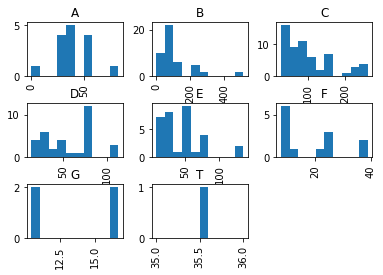

In [10]:
df_train["Fare"].hist(by=df_train['cabin_class'])
plt.show()   

In [11]:
#Create a dummy dataframe from the cabin class
df_dummy_cabin = pd.get_dummies(df_train['cabin_class'], prefix='cabin_class')
df_dummy_cabin

,cabin_class_A,cabin_class_B,cabin_class_C,cabin_class_D,cabin_class_E,cabin_class_F,cabin_class_G,cabin_class_T
0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
886,0,0,0,0,0,0,0,0
887,0,1,0,0,0,0,0,0
888,0,0,0,0,0,0,0,0
889,0,0,1,0,0,0,0,0


In [12]:
#Add the dummy table to the first dataset
df_train = pd.concat([df_train, df_dummy_cabin], axis=1)

In [13]:
def categorise_Sibsp(row):
    """Categorise the SibSp column into 3 categories
    output:
    2: if more than one sibling
    1: if one sibling only
    0: if no no
    """
    temp_dict={1:"Couple", 0:"Single"}
    if row in temp_dict.keys():
        return temp_dict[row]
    else:
        return "Family"

<function matplotlib.pyplot.show(close=None, block=None)>

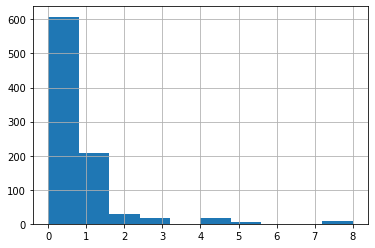

In [14]:
df_train["SibSp"].hist()
plt.show

In [15]:
df_train["SibSp_group"] = df_train["SibSp"].apply(lambda x: categorise_Sibsp(x))

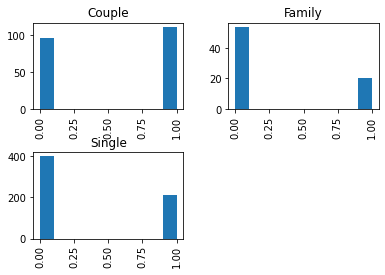

In [16]:
df_train["Survived"].hist(by=df_train['SibSp_group'])
plt.show()   

In [17]:
#Ratio of survivals:
survivals =  df_train["Survived"].value_counts()
print(survivals)

0    549
1    342
Name: Survived, dtype: int64


In [18]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    891 non-null    int64  
 1   Survived       891 non-null    int64  
 2   Pclass         891 non-null    int64  
 3   Name           891 non-null    object 
 4   Sex            891 non-null    object 
 5   Age            714 non-null    float64
 6   SibSp          891 non-null    int64  
 7   Parch          891 non-null    int64  
 8   Ticket         891 non-null    object 
 9   Fare           891 non-null    float64
 10  Cabin          204 non-null    object 
 11  Embarked       889 non-null    object 
 12  cabin_class    204 non-null    object 
 13  cabin_class_A  891 non-null    uint8  
 14  cabin_class_B  891 non-null    uint8  
 15  cabin_class_C  891 non-null    uint8  
 16  cabin_class_D  891 non-null    uint8  
 17  cabin_class_E  891 non-null    uint8  
 18  cabin_clas

In [19]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,cabin_class,cabin_class_A,cabin_class_B,cabin_class_C,cabin_class_D,cabin_class_E,cabin_class_F,cabin_class_G,cabin_class_T,SibSp_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,NaN,0,0,0,0,0,0,0,0,Couple
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,0,0,1,0,0,0,0,0,Couple
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,NaN,0,0,0,0,0,0,0,0,Single
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,C,0,0,1,0,0,0,0,0,Couple
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,NaN,0,0,0,0,0,0,0,0,Single


In [20]:
# Data oversamling:
# df_not_survived = df_train[df_train["Survived"] == 0] #define non survived people column
# df_survived = df_train[df_train["Survived"] == 1].sample(len(df_not_survived), replace=True)



## Prepare Dataset for machine learning

### Create dummy dataframe and concatenation

In [21]:
#Create a dummy dataframe from the sex class
df_dummy_sex = pd.get_dummies(df_train['Sex'], prefix= "Sex")

In [22]:
#Create a dummy dataframe from the Embarked features
df_dummy_embarked= pd.get_dummies(df_train['Embarked'], prefix= "Embarked")

In [23]:
#Create a dummy dataframe from the SibSp_group
df_dummy_SibSp_group= pd.get_dummies(df_train['SibSp_group'], prefix= "SibSp_group")

In [24]:
df_train = pd.concat([df_train, df_dummy_sex], axis=1)
df_train = pd.concat([df_train, df_dummy_embarked], axis=1)
df_train = pd.concat([df_train, df_dummy_SibSp_group], axis=1)

In [25]:
#Drop Name, Ticket, Cabin column
df_train.drop(["Name", "Ticket", "Cabin", "cabin_class", "Sex", "SibSp_group", "Embarked"], axis=1, inplace=True)

In [26]:
df_train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,cabin_class_A,cabin_class_B,cabin_class_C,...,cabin_class_G,cabin_class_T,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,SibSp_group_Couple,SibSp_group_Family,SibSp_group_Single
0,1,0,3,22.0,1,0,7.2500,0,0,0,...,0,0,0,1,0,0,1,1,0,0
1,2,1,1,38.0,1,0,71.2833,0,0,1,...,0,0,1,0,1,0,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,0,...,0,0,1,0,0,0,1,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1,...,0,0,1,0,0,0,1,1,0,0
4,5,0,3,35.0,0,0,8.0500,0,0,0,...,0,0,0,1,0,0,1,0,0,1


In [27]:
#Fill missing value by the mean
df_train["Age"] = df_train["Age"].fillna(df_train["Age"].mean()).astype(int)
df_train["Age"]

0      22
1      38
2      26
3      35
4      35
       ..
886    27
887    19
888    29
889    26
890    32
Name: Age, Length: 891, dtype: int32

In [29]:
Y = df_train["Survived"]
X = df_train.drop("Survived", axis=1)

In [30]:
scaler = StandardScaler()
df_train_norm = scaler.fit_transform(df_train)